# 第十一章 可视化


## Visualization with Seaborn

- Seaborn is a Python data visualization library based on matplotlib. 
- It provides a high-level interface for drawing attractive and informative statistical graphics.
- it integrates with the functionality provided by Pandas DataFrames.

In [2]:
%matplotlib inline

import numpy as np; np.random.seed(22)
import seaborn as sns; 
import pylab as plt

To be fair, the Matplotlib team is addressing this: 
- it has recently added the plt.style tools, 
- is starting to handle Pandas data more seamlessly.

## Matplotlib Styles

In [8]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

The basic way to switch to a stylesheet is to call

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the session!
Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


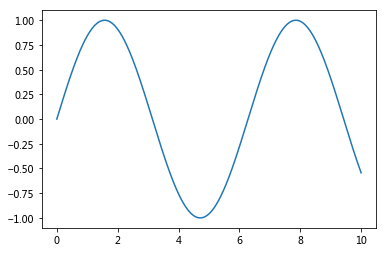

In [5]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x));

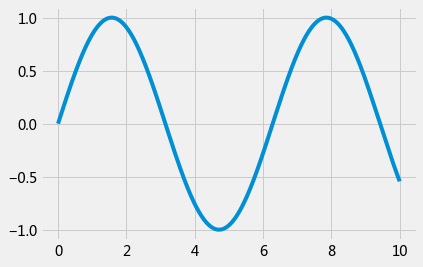

In [7]:
plt.style.use('fivethirtyeight')
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x));

## Seaborn Datasets

In [49]:
sns.get_dataset_names()

/Users/datalab/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /Users/datalab/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

## lineplot

In [61]:
fmri = sns.load_dataset("fmri")

In [20]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18.0,stim,parietal,-0.017552
1,s5,14.0,stim,parietal,-0.080883
2,s12,18.0,stim,parietal,-0.081033
3,s11,18.0,stim,parietal,-0.046134
4,s10,18.0,stim,parietal,-0.037970


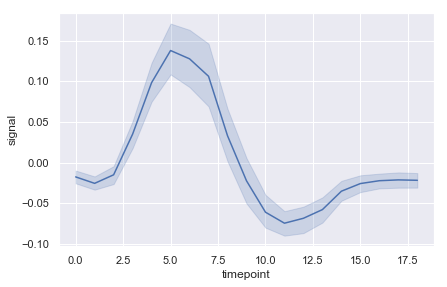

In [33]:
ax = sns.lineplot(x="timepoint", y="signal", err_style="band",data=fmri)

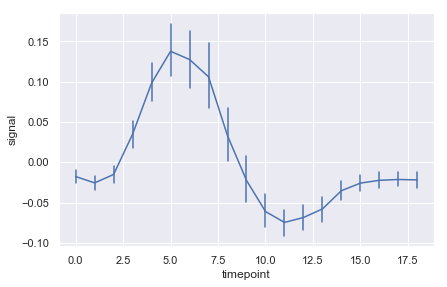

In [28]:
ax = sns.lineplot(x="timepoint", y="signal", err_style="bars",data=fmri)

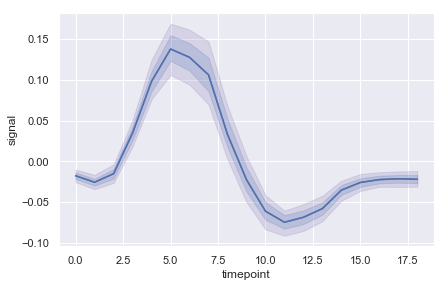

In [63]:
ax = sns.lineplot(x="timepoint", y="signal", ci=95, color="m",data=fmri)
ax = sns.lineplot(x="timepoint", y="signal", ci=68, color="b",data=fmri)

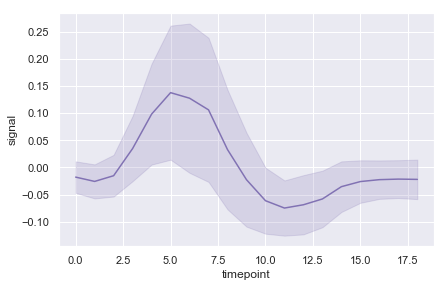

In [35]:
ax = sns.lineplot(x="timepoint", y="signal", ci='sd', color="m",data=fmri)

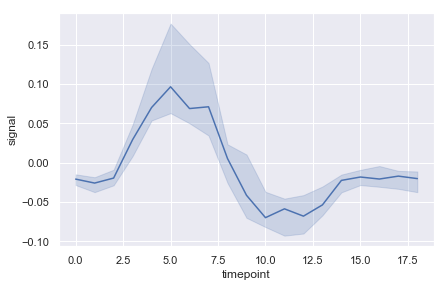

In [37]:
ax = sns.lineplot(x="timepoint", y="signal", estimator=np.median, data=fmri)

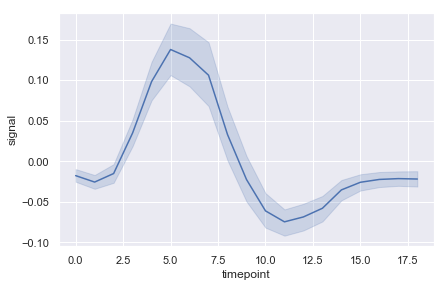

In [41]:
#ax = sns.tsplot(data=data, err_style="boot_traces", n_boot=500)
ax = sns.lineplot(x="timepoint", y="signal", err_style="band", n_boot=500, data=fmri)

http://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot

## Bar Plot

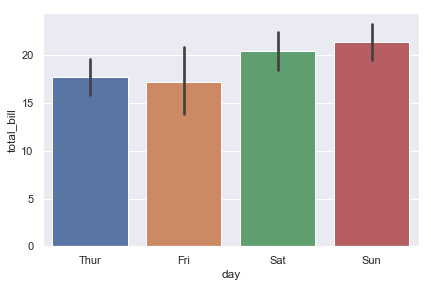

In [42]:
import seaborn as sns; 
sns.set(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

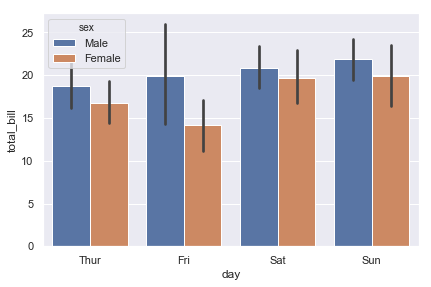

In [43]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)


## Clustermap

**Discovering structure in heatmap data**

http://seaborn.pydata.org/examples/structured_heatmap.html

In [57]:
df = sns.load_dataset("titanic")
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


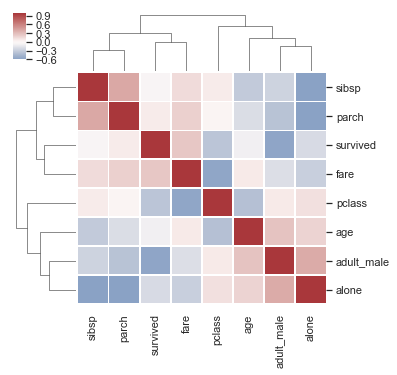

In [60]:
# Draw the full plot
ax = sns.clustermap(df.corr(), center=0, cmap="vlag",
               #row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(5, 5))


```{toctree}
:hidden:
:titlesonly:


19-visualization-with-pyecharts
19-visualization-maps-using-folium
19-visualization-datashader
19-visualization-datapane
```
